# Prosper.com Loans: Exploring Relationships Affecting the Borrower's Interest Rate
## by Richard Steele

## Preliminary Wrangling

This document explores a dataset containing data for approximately 114,000 non-bank loans from Prosper.com.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_loans = pd.read_csv(r'C:\Users\Richard\OneDrive\Documents\Data Science Courses\Data Analyst Course\DAND Project 4\ProsperLoanData.csv')

df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_loans.shape

(113937, 81)

In [4]:
df_loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df_loans.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

### What is the structure of your dataset?

> The dataset is a comma-separated file, comprising 113,937 rows and 81 columns. Each column represents a variable, and each row represents an individual loan. Most of the variables are numeric.

### What is/are the main feature(s) of interest in your dataset?

> Using the Prosper.com loan data file, I want to find which variables affect the interest rate of a Prosper.com loan. I chose a series of variables commonly used by most lenders as criteria for deciding whether to grant the loan and, once the is granted, determing the risk, and thus the interest rate charged.

> In other words, for a non-bank organization which is effectively a crowdfunding source, which may or may not rely on financial markets to determine interest rates, what goes into the determination of the borrowers' rates? Which variables are the most important, and what goes into _them_ as well?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The most helpful features are those which I believe have a relationship or other form of influence on the effective interest rate. I expect these to be the credit-score range, the open credit lines, the debt-to-income ratio, the income range, whether the borrower is a homeowner, the borrower's current deliquencies, the revolving credit, and the borrower's Prosper rating (numeric version).

## Univariate Exploration

> I noticed, during a visual assessment of the original csv file in Excel, that almost all of the variables of interest contain a sizeable number of null values. My first exploration will be an assessment thereof. 




In [6]:
sum(df_loans['BorrowerRate'].isnull())

0

In [7]:
sum(df_loans['EmploymentStatus'].isnull())

2255

In [8]:
sum(df_loans['CreditScoreRangeLower'].isnull())

591

In [9]:
sum(df_loans['CreditScoreRangeUpper'].isnull())

591

In [10]:
sum(df_loans['OpenCreditLines'].isnull())

7604

In [11]:
sum(df_loans['DebtToIncomeRatio'].isnull())

8554

In [12]:
sum(df_loans['IncomeRange'].isnull())

0

In [13]:
sum(df_loans['IsBorrowerHomeowner'].isnull())

0

In [14]:
sum(df_loans['CurrentDelinquencies'].isnull())

697

In [15]:
sum(df_loans['RevolvingCreditBalance'].isnull())

7604

In [16]:
sum(df_loans['ProsperRating (numeric)'].isnull())

29084

> The variable with the greatest number of null values is 'ProsperRating (numeric). Therefore, those rows will be summarily removed.

In [17]:
df_loans = df_loans[np.isfinite(df_loans['ProsperRating (numeric)'])]

> Now to test if the cleaning succeeded:

In [18]:
sum(df_loans['BorrowerRate'].isnull())

0

In [19]:
sum(df_loans['EmploymentStatus'].isnull())

0

In [20]:
sum(df_loans['CreditScoreRangeLower'].isnull())

0

In [21]:
sum(df_loans['CreditScoreRangeUpper'].isnull())

0

In [22]:
sum(df_loans['OpenCreditLines'].isnull())

0

In [23]:
sum(df_loans['DebtToIncomeRatio'].isnull())

7296

In [24]:
sum(df_loans['IncomeRange'].isnull())

0

In [25]:
sum(df_loans['IsBorrowerHomeowner'].isnull())

0

In [26]:
sum(df_loans['CurrentDelinquencies'].isnull())

0

In [27]:
sum(df_loans['RevolvingCreditBalance'].isnull())

0

In [28]:
sum(df_loans['ProsperRating (numeric)'].isnull())

0

> Well, the DebtToIncomeRatio still holds a lot of nulls, so they will go, too.

In [29]:
df_loans = df_loans[np.isfinite(df_loans['DebtToIncomeRatio'])]

In [30]:
sum(df_loans['DebtToIncomeRatio'].isnull())

0

In [31]:
df_loans.shape

(77557, 81)

The exploration will begin in earnest with the primary variable of interest: the borrower interest rate.

In [32]:
df_loans.BorrowerRate.describe()

count    77557.000000
mean         0.193411
std          0.073899
min          0.040000
25%          0.134900
50%          0.184500
75%          0.252400
max          0.360000
Name: BorrowerRate, dtype: float64

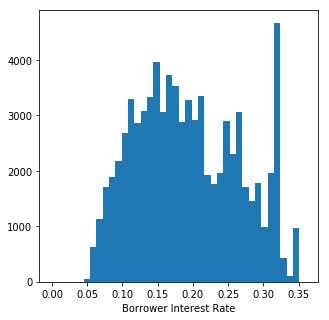

In [33]:
plt.figure(figsize=[5,5])
binsize = 0.0090
bins = np.arange(0, df_loans['BorrowerRate'].max()+binsize, binsize)

plt.hist(x='BorrowerRate', data = df_loans, bins = bins)
plt.xlabel('Borrower Interest Rate')
plt.show();

In [34]:
from statistics import mode
mode(df_loans['BorrowerRate']), round(np.mean(df_loans['BorrowerRate']), 4), round(np.std(df_loans['BorrowerRate']), 4)

(0.3177, 0.1934, 0.0739)

> What jumps out from this distribution is the mode which literally pops out of nowhere at approximately 32%, aboout 1.7 standard deviations from the mean. This definitely warrants keeping on eye on this particular interest rate.

EmploymentStatus:

In [35]:
df_loans['EmploymentStatus'].value_counts()

Employed         65884
Full-time         7585
Other             3526
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

> Of the 77,577 loans in question, the overwhelming majority of borrowers are employed, and the subgroups are small in comparison. I will disregard this variable.

CreditScoreRangeLower and CreditScoreRangeUpper:

In [36]:
df_loans.CreditScoreRangeLower.describe()

count    77557.000000
mean       698.999446
std         47.160646
min        600.000000
25%        660.000000
50%        700.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

In [37]:
df_loans.CreditScoreRangeUpper.describe()

count    77557.000000
mean       717.999446
std         47.160646
min        619.000000
25%        679.000000
50%        719.000000
75%        739.000000
max        899.000000
Name: CreditScoreRangeUpper, dtype: float64

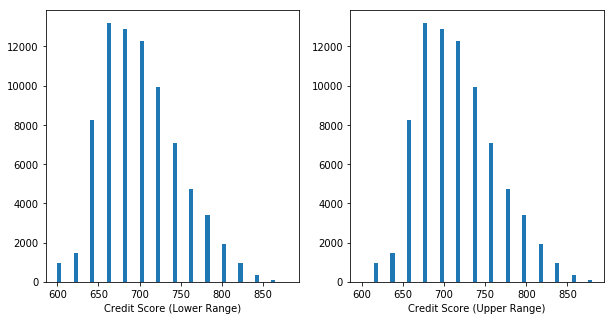

In [38]:
plt.figure(figsize=[10,5])
binsize = 5
bins = np.arange(600, df_loans['CreditScoreRangeLower'].max()+binsize, binsize)

plt.subplot(1,2,1)
plt.hist(x='CreditScoreRangeLower', data = df_loans, bins = bins)
plt.xlabel('Credit Score (Lower Range)')

plt.subplot(1,2,2)
plt.hist(x='CreditScoreRangeUpper', data = df_loans, bins = bins)
plt.xlabel('Credit Score (Upper Range)')
plt.show()

> The nearly identical distributions of the two credit-score variables suggests an averaging of the two into a single variable is indicated for ease in analysis:

In [39]:
df_loans['AverageCreditScore'] = (df_loans['CreditScoreRangeUpper'] + df_loans['CreditScoreRangeLower'])/2

In [40]:
df_loans['AverageCreditScore'].describe()

count    77557.000000
mean       708.499446
std         47.160646
min        609.500000
25%        669.500000
50%        709.500000
75%        729.500000
max        889.500000
Name: AverageCreditScore, dtype: float64

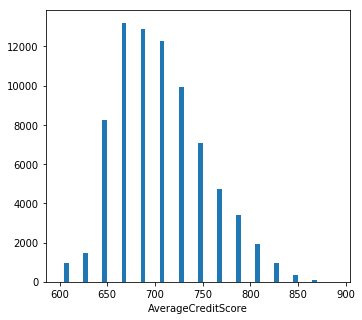

In [41]:
plt.figure(figsize=[12,5])
binsize = 5
bins = np.arange(600, df_loans['AverageCreditScore'].max()+binsize, binsize)

plt.subplot(1,2,1)
plt.hist(x='AverageCreditScore', data = df_loans, bins = bins)
plt.xlabel('AverageCreditScore')
plt.show()

OpenCreditLines:

In [42]:
df_loans['OpenCreditLines'].describe()

count    77557.000000
mean         9.599366
std          4.926163
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         54.000000
Name: OpenCreditLines, dtype: float64

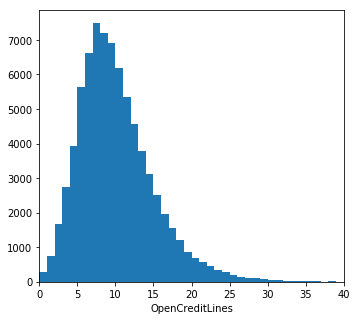

In [43]:
plt.figure(figsize=[12,5])
binsize = 1
bins = np.arange(0, df_loans['OpenCreditLines'].max()+binsize, binsize)

plt.subplot(1,2,1)
plt.hist(x='OpenCreditLines', data = df_loans, bins = bins)
plt.xlabel('OpenCreditLines')
plt.xlim(0, 40)
plt.show()

DebtToIncomeRatio:

In [44]:
df_loans['DebtToIncomeRatio'].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

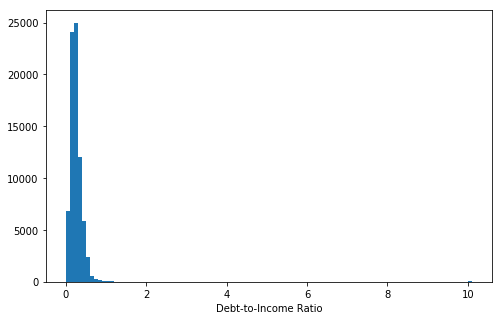

In [45]:
plt.figure(figsize=[8,5])
binsize = 0.1
bins = np.arange(0, df_loans['DebtToIncomeRatio'].max()+binsize, binsize)

plt.hist(x='DebtToIncomeRatio', data = df_loans, bins = bins)
plt.xlabel('Debt-to-Income Ratio')
plt.show()

The outliers (the maximum was nearly 31 standard deviations from the mean) significantly shove the data to the left, warranting a smaller bin size and an axis limit.

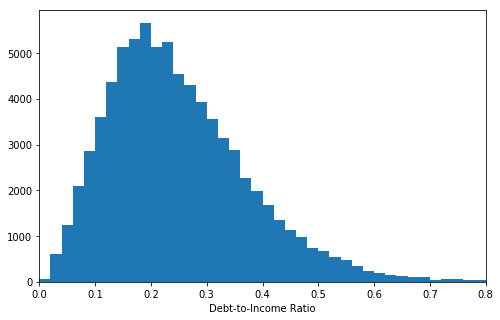

In [46]:
plt.figure(figsize=[8,5])
binsize = 0.02
bins = np.arange(0, df_loans['DebtToIncomeRatio'].max()+binsize, binsize)

plt.hist(x='DebtToIncomeRatio', data = df_loans, bins = bins)
plt.xlabel('Debt-to-Income Ratio')
plt.xlim(0, 0.8)
plt.show()

> A relatively smoother unimodal distribution is more reasonable.

IncomeRange:

In [47]:
df_loans.IncomeRange.value_counts()

$50,000-74,999    24030
$25,000-49,999    22023
$100,000+         14019
$75,000-99,999    13644
$1-24,999          3840
Not employed          1
Name: IncomeRange, dtype: int64

In [48]:
df_loans.IncomeRange.value_counts()/df_loans.shape[0]

$50,000-74,999    0.309837
$25,000-49,999    0.283959
$100,000+         0.180757
$75,000-99,999    0.175922
$1-24,999         0.049512
Not employed      0.000013
Name: IncomeRange, dtype: float64

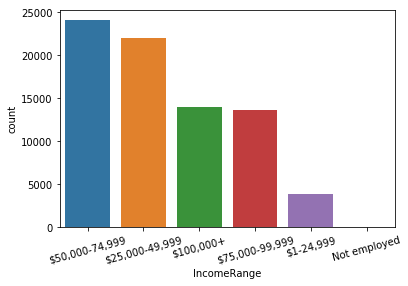

In [49]:
sb.countplot(data=df_loans, x='IncomeRange')
plt.xticks(rotation=15);

> What's compelling here is that the largest number of borrowers are the more middle-class brackets; I would expect a non-bank lender to attract more low-income prospects.

IsBorrowerHomeowner:

In [50]:
df_loans.IsBorrowerHomeowner.value_counts()/df_loans.shape[0]

True     0.542427
False    0.457573
Name: IsBorrowerHomeowner, dtype: float64

> Since the proportions of the variable are close to each other, I adjudged this variable as having no substantive impact and therefore disregarded it.

CurrentDelinquencies:

In [51]:
df_loans.CurrentDelinquencies.value_counts()/df_loans.shape[0]

0.0     0.837229
1.0     0.098212
2.0     0.031190
3.0     0.012533
4.0     0.007440
5.0     0.003675
6.0     0.002862
7.0     0.002037
8.0     0.001328
9.0     0.000941
10.0    0.000683
11.0    0.000554
13.0    0.000322
12.0    0.000297
15.0    0.000155
14.0    0.000129
16.0    0.000116
17.0    0.000103
21.0    0.000064
24.0    0.000026
18.0    0.000026
27.0    0.000026
22.0    0.000013
32.0    0.000013
20.0    0.000013
51.0    0.000013
Name: CurrentDelinquencies, dtype: float64

> Since the majority of the borrowers (83.73%) have no current delinquencies, this variable also has no real influence and is excluded.

RevolvingCreditBalance:

In [52]:
df_loans['RevolvingCreditBalance'].describe()

count     77557.000000
mean      17696.703367
std       30381.727031
min           0.000000
25%        3904.000000
50%        9372.000000
75%       20207.000000
max      999165.000000
Name: RevolvingCreditBalance, dtype: float64

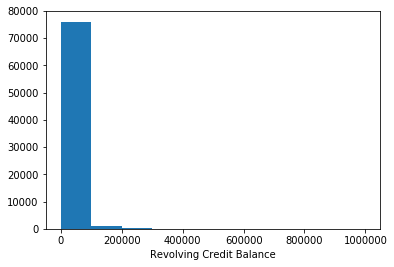

In [53]:
plt.hist(x='RevolvingCreditBalance', data = df_loans)
plt.xlabel('Revolving Credit Balance')
plt.show()

> This distribution clearly reflects the presence of high-value outliers as implied in the "describe" results: the difference between the maximum value and that of the 75th percentile is very large, prompting the need for adjustments.

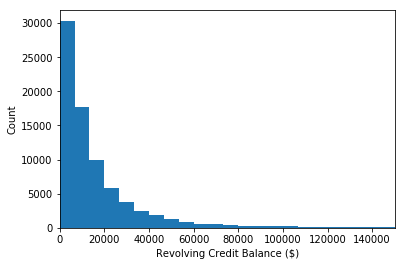

In [54]:
plt.hist(data=df_loans, x='RevolvingCreditBalance', bins=150)
plt.xlim(0, 150000)
plt.xlabel('Revolving Credit Balance ($)')
plt.ylabel('Count');

Even with the axis limits, the long tail of the distribution indicates a further examination of the outliers.

In [55]:
df_loans.query('RevolvingCreditBalance > 100000')['RevolvingCreditBalance'].count()

1512

> The long tail and the number of outliers warrant a log transformation of this distribution.

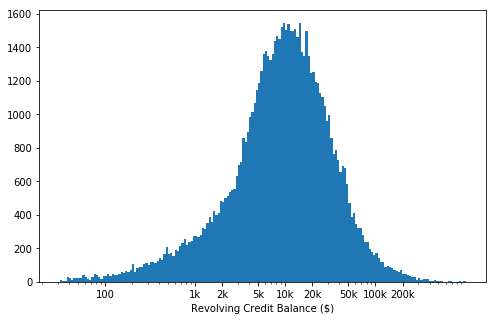

In [56]:
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(df_loans['RevolvingCreditBalance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'RevolvingCreditBalance', bins = bins)
plt.xscale('log')
plt.xticks([100, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5], [100, '1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
plt.xlabel('Revolving Credit Balance ($)')
plt.show()

 This makes more sense; a person with a moderately large amount of revolving credit would have an easier time getting a loan from a non-bank institution such as Prosper while most people with an unhealthy volume of such debt would encounter difficulty almost anywhere.

ProsperRating (numeric):

In [57]:
df_loans['ProsperRating (numeric)'].describe()

count    77557.000000
mean         4.131761
std          1.658808
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRating (numeric), dtype: float64

In [58]:
df_loans['ProsperRating (numeric)'].value_counts()

4.0    16890
5.0    14631
6.0    13705
3.0    12824
2.0     8617
1.0     5739
7.0     5151
Name: ProsperRating (numeric), dtype: int64

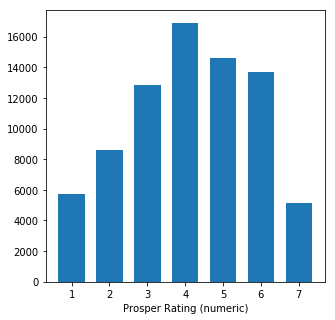

In [59]:
plt.figure(figsize=[5,5])
binsize = 1
bins = np.arange(0.5, df_loans['ProsperRating (numeric)'].max()+binsize, binsize)

plt.hist(x='ProsperRating (numeric)', data = df_loans, bins = bins, rwidth = 0.7)
plt.xlabel('Prosper Rating (numeric)')
plt.xticks(np.arange(1, 7+1, 1))
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The mode for the primary variable of interest (BorrowerRate) was toward the right tail of the distribution, and was significantly larger than the points around it.

> The RevolvingCreditBalance variable distribution has a very strong rightward skew, necessitating a log transformation which produced a smmother unimodal distribution, peaking at around $10,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The first characteristic to address was the significant number of columns containing, in turn, a sizeable count of null values. This required a thorough removal thereof, because otherwise the distribution code encountered errors.

> The two credit-balance variables produced nearly identical distributions, so to make further analysis easier and a bit more efficient, I took the average of the two.

## Bivariate Exploration

In [60]:
numeric_vars = ['BorrowerRate', 'OpenCreditLines', 'AverageCreditScore', 'DebtToIncomeRatio', 'RevolvingCreditBalance', 'ProsperRating (numeric)']


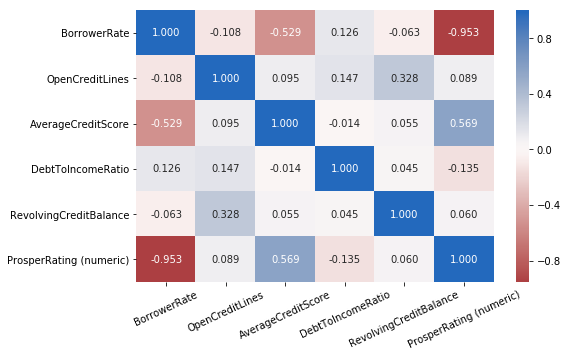

In [61]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.xticks(rotation = 25)
plt.show()

> The strongest correlations involve average credit score, the numeric Prosper rating, and the borrower interest. This tells me that the first two have the most influence on the interest rate, much less than any of the others. I'll look at the pairings in a series of scatter and line plots to see what the trend is for each.

Average Credit Score & Prosper Rating (numeric):

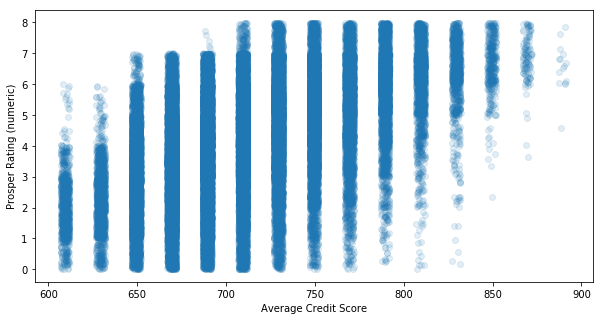

In [62]:
plt.figure(figsize=[10,5])

sb.regplot(data=df_loans, x='AverageCreditScore', y='ProsperRating (numeric)', fit_reg = False, x_jitter = 2.5, y_jitter = 1, scatter_kws = {'alpha' : 1/8})
plt.xlabel('Average Credit Score')
plt.ylabel('Prosper Rating (numeric)')
plt.xticks();

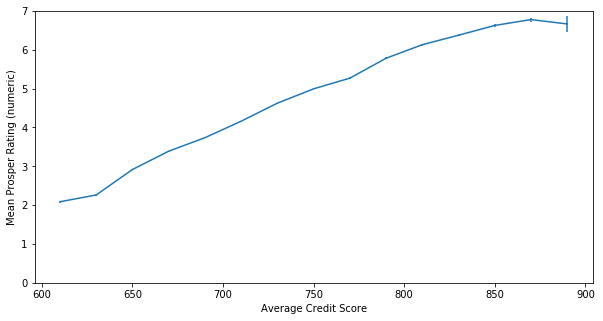

In [63]:
plt.figure(figsize=[10,5])

bin_size = 20
xbin_edges = np.arange(0, df_loans['AverageCreditScore'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['AverageCreditScore'], xbin_edges, right=False, include_lowest=True)

y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()

plt.errorbar(x=xbin_centers, y=y_means, yerr = y_sems)
plt.ylim(0,7)
plt.ylabel('Mean Prosper Rating (numeric)')
plt.xlabel('Average Credit Score')
plt.xticks();

> Both plots clearly indicate the strong positive correlation, with very little error in the process.

Average Credit Score & Borrower Rate:

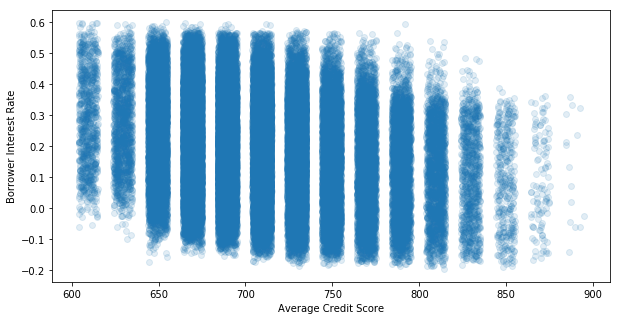

In [64]:
plt.figure(figsize=[10,5])

sb.regplot(data=df_loans, x='AverageCreditScore', y='BorrowerRate', fit_reg = False, x_jitter = 5.5, y_jitter = 0.25, scatter_kws = {'alpha' : 1/8})
plt.xlabel('Average Credit Score')
plt.ylabel('Borrower Interest Rate')
plt.xticks();

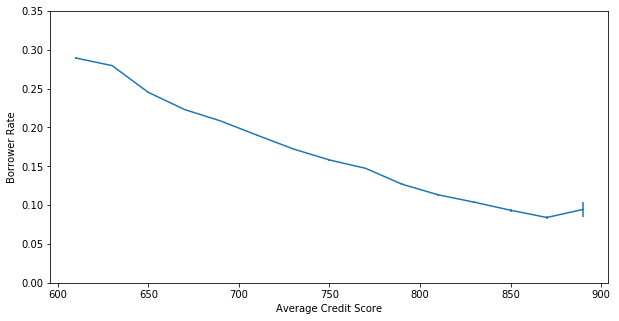

In [65]:
plt.figure(figsize=[10,5])

data_xbins = pd.cut(df_loans['AverageCreditScore'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['BorrowerRate'].groupby(data_xbins).mean()
y_sems = df_loans['BorrowerRate'].groupby(data_xbins).sem()

plt.errorbar(x=xbin_centers, y=y_means, yerr = y_sems)
plt.ylim(0,0.35)
plt.ylabel('Borrower Rate')
plt.xlabel('Average Credit Score')
plt.xticks();


> Another clear demonstration of influence, this time in the opposite direction.

At this point I'll examne the relationships between the lesser-correlated variables; one would think the influence of these upon the Prosper rating and interest rate would be clear, yet the correlation matrix says otherwise.

First, the Open Credit Lines and Borrower Interest Rate.

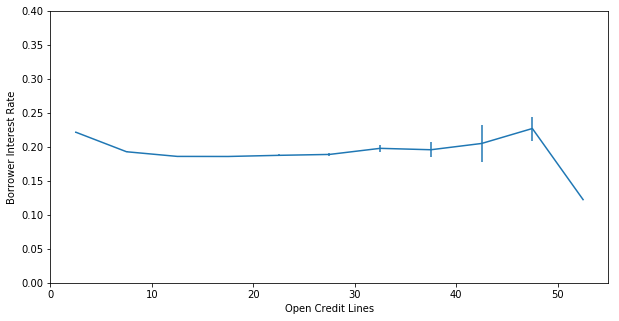

In [66]:
plt.figure(figsize=[10,5])

bin_size = 5
xbin_edges = np.arange(0, df_loans['OpenCreditLines'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['OpenCreditLines'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['BorrowerRate'].groupby(data_xbins).mean()
y_sems = df_loans['BorrowerRate'].groupby(data_xbins).sem()


plt.errorbar(x=xbin_centers, y=y_means, yerr = y_sems)
plt.ylim(0,0.40)
plt.ylabel('Borrower Interest Rate')
plt.xlabel('Open Credit Lines')
plt.xticks();

Open Credit Lines and Prosper Rating (numeric).

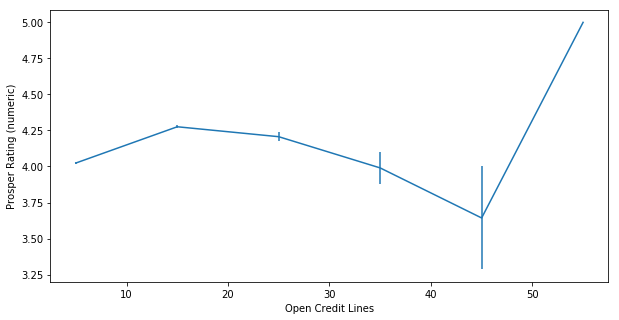

In [67]:
plt.figure(figsize=[10,5])

bin_size = 10
xbin_edges = np.arange(0, df_loans['OpenCreditLines'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['OpenCreditLines'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()


plt.errorbar(x=xbin_centers, y=y_means, yerr = y_sems)
plt.ylabel('Prosper Rating (numeric)')
plt.xlabel('Open Credit Lines')
plt.xticks();

> The above two plots showing an interesting mirror image of one another. Moreover, the lack of correlation is reflected in the size of the error bars in both plots.

DebtToIncomeRatio v BorrowerRate & ProsperRating (numeric): 

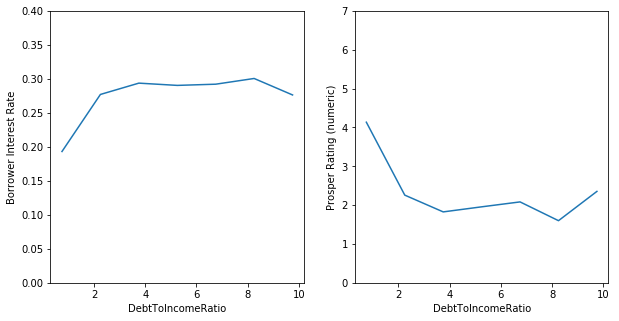

In [68]:
plt.figure(figsize=[10,5])

bin_size = 1.5
xbin_edges = np.arange(0, df_loans['DebtToIncomeRatio'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['DebtToIncomeRatio'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['BorrowerRate'].groupby(data_xbins).mean()
y_sems = df_loans['BorrowerRate'].groupby(data_xbins).sem()

plt.subplot(1,2,1)
plt.errorbar(x=xbin_centers, y=y_means)
plt.ylim(0,0.40)
plt.ylabel('Borrower Interest Rate')
plt.xlabel('DebtToIncomeRatio')
plt.xticks();

plt.subplot(1,2,2)
y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()

plt.errorbar(x=xbin_centers, y=y_means)
plt.ylim(0,7)
plt.ylabel('Prosper Rating (numeric)')
plt.xlabel('DebtToIncomeRatio')
plt.xticks();

> These are unsurprising trends, yet the small slope betrays the lesser influence.

IncomeRange v BorrowerRate & ProsperRating (numeric):

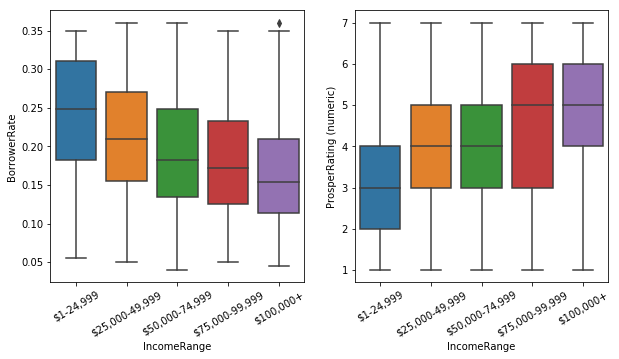

In [69]:
plt.figure(figsize=[10,5])

tick_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

plt.subplot(1,2,1)
sb.boxplot(data=df_loans, x='IncomeRange', y='BorrowerRate', order=tick_order)
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sb.boxplot(data=df_loans, x='IncomeRange', y='ProsperRating (numeric)', order=tick_order)
plt.xticks(rotation=30);

> Looking at the medians, the immediate relations are clear and as expected; a higher income tends to mean a better ability to pay and thus a lower interest rate and a higher Prosper rate. However, what gets my attention are the whisker lengths and the IQRs, which indicate a sizeable variability. In other words, one can have a low income and still pay the bills on time, and conversely, one can have a high income and spend oneself into the hole of red ink.

RevolvingCreditBalance v BorrowerAPR & ProsperRating (numeric):

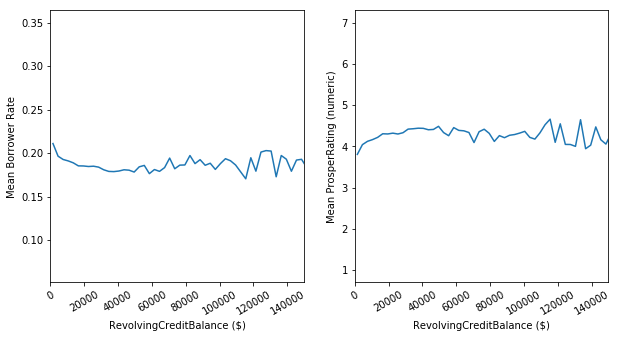

In [70]:
plt.figure(figsize=[10,5])

bin_size = 3000
xbin_edges = np.arange(0, df_loans['RevolvingCreditBalance'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['RevolvingCreditBalance'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['BorrowerRate'].groupby(data_xbins).mean()

plt.subplot(1,2,1)
plt.errorbar(x=xbin_centers, y=y_means)
plt.xlim(0,150000)
plt.ylabel('Mean Borrower Rate')
plt.xlabel('RevolvingCreditBalance ($)')
plt.xticks(rotation = 30);

bin_size = 3000
xbin_edges = np.arange(0, df_loans['RevolvingCreditBalance'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['RevolvingCreditBalance'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()

plt.subplot(1,2,2)
plt.errorbar(x=xbin_centers, y=y_means)
plt.xlim(0,150000)
plt.ylabel('Mean ProsperRating (numeric)')
plt.xlabel('RevolvingCreditBalance ($)')
plt.xticks(rotation = 30);

The removal of the axis limits regarding the borrower-rate plot might shed some light on a previous mystery.

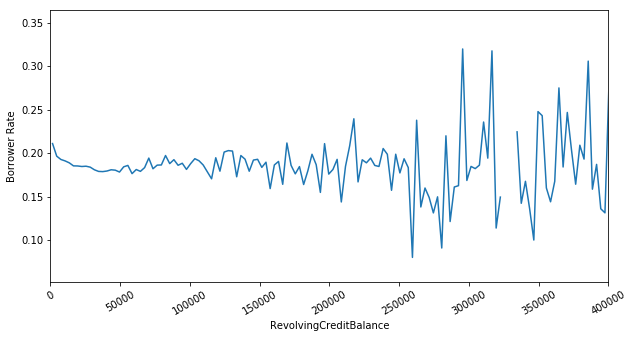

In [71]:
plt.figure(figsize=[10,5])

bin_size = 3000
xbin_edges = np.arange(0, df_loans['RevolvingCreditBalance'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['RevolvingCreditBalance'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['BorrowerRate'].groupby(data_xbins).mean()

plt.errorbar(x=xbin_centers, y=y_means)
plt.xlim(0,400000)
plt.ylabel('Borrower Rate')
plt.xlabel('RevolvingCreditBalance')
plt.xticks(rotation = 30);

> As shown above, the plotting of RevolvingCreditBalance against BorrowerAPR and PropsperRating (numeric) starts with an intriguing curvature of a tightly narrowed series of fluctuations, which gradually widens into wildly oscillating feature. I noted that at some of the higher balances, the interest rate plummeted and the Prosper score sharply increased, demonstrating that other variables are at work besides revolving credit. One aspect of note: with a high balance (> $300,000) a spike occurs at the curious ~32 percent rate from the first univariate plot of the borrower rate. This (among other factors) could help explain the sudden rise in the rate observed in the univariate plot. 

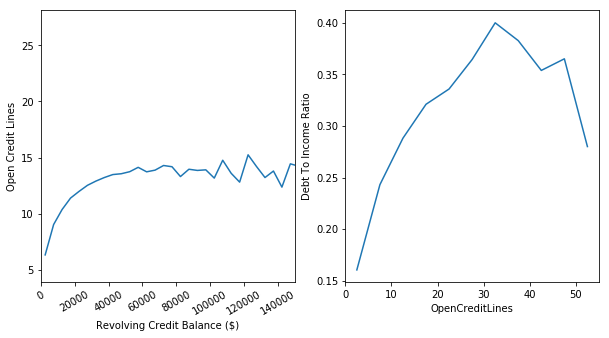

In [72]:
plt.figure(figsize=[10,5])

bin_size = 5000
xbin_edges = np.arange(0, df_loans['RevolvingCreditBalance'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['RevolvingCreditBalance'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['OpenCreditLines'].groupby(data_xbins).mean()

plt.subplot(1,2,1)
plt.errorbar(x=xbin_centers, y=y_means)
plt.xlim(0,150000)
plt.ylabel('Open Credit Lines')
plt.xlabel('Revolving Credit Balance ($)')
plt.xticks(rotation = 30);

bin_size = 5
xbin_edges = np.arange(0, df_loans['OpenCreditLines'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['OpenCreditLines'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['DebtToIncomeRatio'].groupby(data_xbins).mean()

plt.subplot(1,2,2)
plt.errorbar(x=xbin_centers, y=y_means)
plt.ylabel('Debt To Income Ratio')
plt.xlabel('OpenCreditLines');

Finally I look at the relation between the interest rate and the Prosper rating.

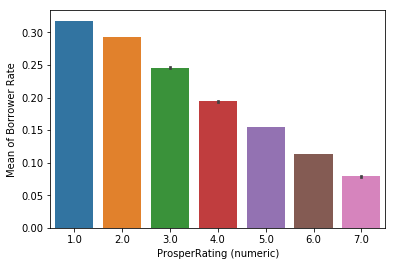

In [73]:
sb.barplot(data = df_loans, x = 'ProsperRating (numeric)', y = 'BorrowerRate')
plt.ylabel('Mean of Borrower Rate')
plt.xlabel('ProsperRating (numeric)')
plt.xticks();

> Clearly, the biggest influence on the borrower interest rate is the Prosper rating. This provides the impetus for the multivariate analysis: what goes into the Prosper rate?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most noteworthy aspect is how few of the variables are even moderately correlated. The strongest correlation is between the borrower rate and the numeric Prosper rating; it is very nearly linear. The next-strongest correlation observed was between the average credit score and the Prosper rate, which I expected to be well-correlated yet was not as strong as I surmised. This tells me that the credit score is a "main ingredient" in determining the Prosper rating.

> The number of open credit lines possessed a disjointed relationship with both the borrower rate and the Prosper rating. The trend of the interest rate and credit lines was almost flat until the number of credit lines reached approximately 45, when any increases thereafter were shown to be positive contributors to the loan package. My own caveat for these pairings is the error in the plots, causing me to question the validity iof the measurements.

> Revolving credit balances appear to be an unimportant feature in determining the variables of interest until they exceed $300,000, after which the relationship is very unstable, and may help to explain the unusual mode of the borrower-rate univariate distribution.

> The income ranges showed a predictable relationship based upon the medians: the more one earns, the better one can pay back the loan. However, the box plots' whiskers and skewed, wide IQRs betray an uncertainty concerning other features, such as debt load.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The trends of open credit lines against debt-to-income and revolving credit balance were rather unexpected. The debt ratio oddly plummeted as the number of credit lines exceed 30---more income = manageable debt. The credit lines leveled out in a somewhat unstable fashion once the revolving balance reached $50,000. This effectively shown an application of the proverbial brake on borrowing.

## Multivariate Exploration

> This section will explore the relationships that between the Prosper numeric rating and the other variables. Given the weak correlations between most of the variables under examination and the borrower rate and Prosper rating, I am limiting the multivariate analysis to the credit score, the debt ratio, the revolving balance, and the income range to determine which of them are the primary factors in predicting and determining the all-important Prosper rating.

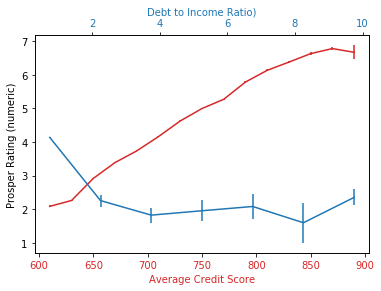

In [74]:
# From the matplotlib online documentation (https://matplotlib.org/gallery/api/two_scales.html) and 
# https://stackoverflow.com/questions/10514315/how-to-add-a-second-x-axis-in-matplotlib:

fig, ax1 = plt.subplots()


bin_size = 20
xbin_edges1 = np.arange(0, df_loans['AverageCreditScore'].max()+bin_size, bin_size)
xbin_centers1 = (xbin_edges1 + bin_size/2)[:-1]

data_xbins1 = pd.cut(df_loans['AverageCreditScore'], xbin_edges1, right=False, include_lowest=True)
y_means1 = df_loans['ProsperRating (numeric)'].groupby(data_xbins1).mean()
y_sems1 = df_loans['ProsperRating (numeric)'].groupby(data_xbins1).sem()

color1 = 'tab:red'
ax1.set_xlabel('Average Credit Score', color=color1)
ax1.set_ylabel('Prosper Rating (numeric)')
plt.errorbar(x=xbin_centers1, y=y_means1, yerr=y_sems1, color=color1)
#ax1.set_xticks(np.arange(0, 900, 50))
ax1.tick_params(axis='x', labelcolor=color1)

ax2 = ax1.twiny()

bin_size = 1.5
xbin_edges = np.arange(0, df_loans['DebtToIncomeRatio'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['DebtToIncomeRatio'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()

plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.ylabel('Prosper Rating (numeric)')
plt.xlabel('Debt to Income Ratio)', color='tab:blue')
plt.xticks(color='tab:blue');

This not unexpected; the average credit score will have greater influence on the Prosper rating than the debt/income ratio, as shown by the steeper slope of the red trend line. At or near the means of the Prosper rating and the average credit score, intriguingly, where the two lines intersect. The debt-to-income ratio shows quite a bit of error, though, as opposed to the credit score.

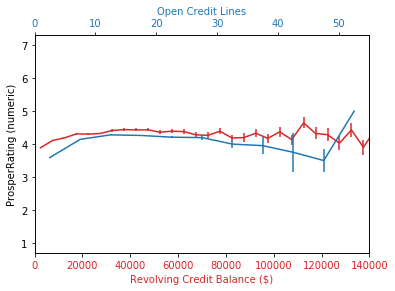

In [75]:
fig, ax1 = plt.subplots()


bin_size = 5000
xbin_edges1 = np.arange(0, df_loans['RevolvingCreditBalance'].max()+bin_size, bin_size)
xbin_centers1 = (xbin_edges1 + bin_size/2)[:-1]

data_xbins1 = pd.cut(df_loans['RevolvingCreditBalance'], xbin_edges1, right=False, include_lowest=True)
y_means1 = df_loans['ProsperRating (numeric)'].groupby(data_xbins1).mean()
y_sems1 = df_loans['ProsperRating (numeric)'].groupby(data_xbins1).sem()

color1 = 'tab:red'
ax1.set_xlabel('Revolving Credit Balance ($)', color=color1)
ax1.set_ylabel('ProsperRating (numeric)')
plt.errorbar(x=xbin_centers1, y=y_means1, yerr=y_sems1, color=color1)
#ax1.set_xticks(np.arange(0, 900, 50))
plt.xlim(0, 140000)
ax1.tick_params(axis='x', labelcolor=color1)

ax2 = ax1.twiny()

bin_size = 5
xbin_edges = np.arange(0, df_loans['OpenCreditLines'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['OpenCreditLines'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()

plt.errorbar(x = xbin_centers, y = y_means, yerr=y_sems)
plt.ylabel('Prosper Rating (numeric)')
plt.xlabel('Open Credit Lines', color='tab:blue')
plt.xticks(color='tab:blue');

> This is the most intriguing plot in the analysis. It shows that the number of open credit lines and the revolving-credit balance have an effectively equal influence on the Prosper rating, and also have a very weak correlation as shown in the above matrix.

Lastly, let's see what the income ranges show. For this visualiztion I'm using an adaptation of the lesson's function which creates summarizations of the means of each bin.

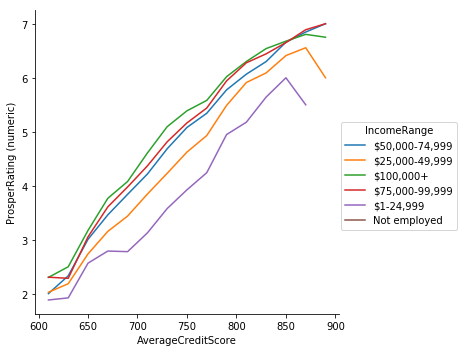

In [76]:
def mean_poly(x, y, bins = 20, **kwargs):
    # This custom-adapts the line plot code,
    # first by setting the bin edges if none exist or are int specified:
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), 1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    # This computes the counts.
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    means = y.groupby(data_bins).mean()
    
    # This creates the plot itself.
    plt.errorbar(x = bin_centers, y = means, **kwargs)
    
bin_edges = np.arange(0, df_loans['AverageCreditScore'].max() + 20, 20)
    
g = sb.FacetGrid(data = df_loans, hue = 'IncomeRange', size = 5)
g.map(mean_poly, "AverageCreditScore", "ProsperRating (numeric)", bins = bin_edges)
g.add_legend();

> This adapted line plot shows that Prosper rating primarily depends on both the average credit score and the income range, the credit score having the greater correlation. Notice how thelines are very closely spaced with similar levels of steepness as both the average score and the income range increase. While income range is a secondary matter, it nonetheless has a greater influence than the other features examined previously.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I find that average score and income rank highest in determining the Prosper score. The debt-to-income ratio comes next, and the credit lines and revolving balance seem to have little influence.

### Were there any interesting or surprising interactions between features?

> As mentioned above, I expected more influence from the open credit lines and revolving credit balance.